In [1]:
# 如果当前目录没有dataset.csv，则调用函数构造数据集特征表
import os  # 导入操作系统接口模块
from feature_extraction import construct_dataframe  # 导入构建特征数据框函数
if(not os.path.exists("dataset.csv")):  # 检查特征数据文件是否存在
    construct_dataframe("dataset")  # 如果不存在，创建特征数据集
print("----------- DataSet is Ready -----------")  # 打印数据集准备完成提示

当前工作目录： d:\Code_Files\实验4\code
----------- DataSet is Ready -----------


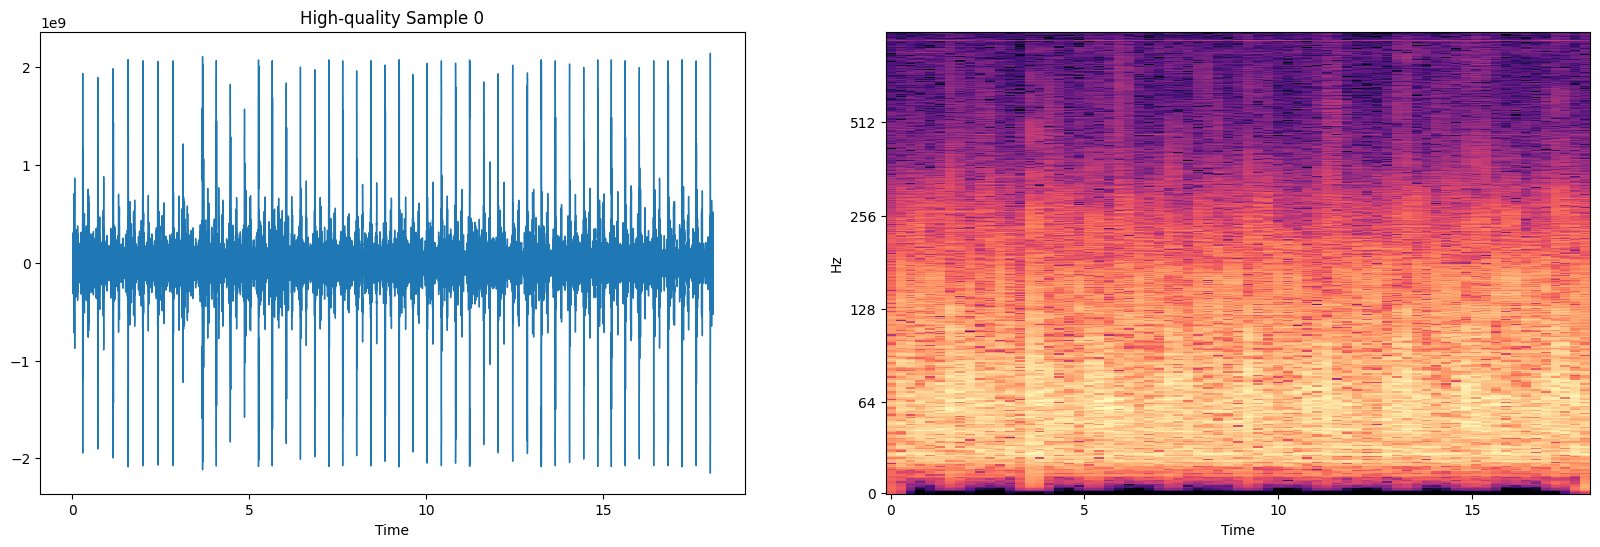

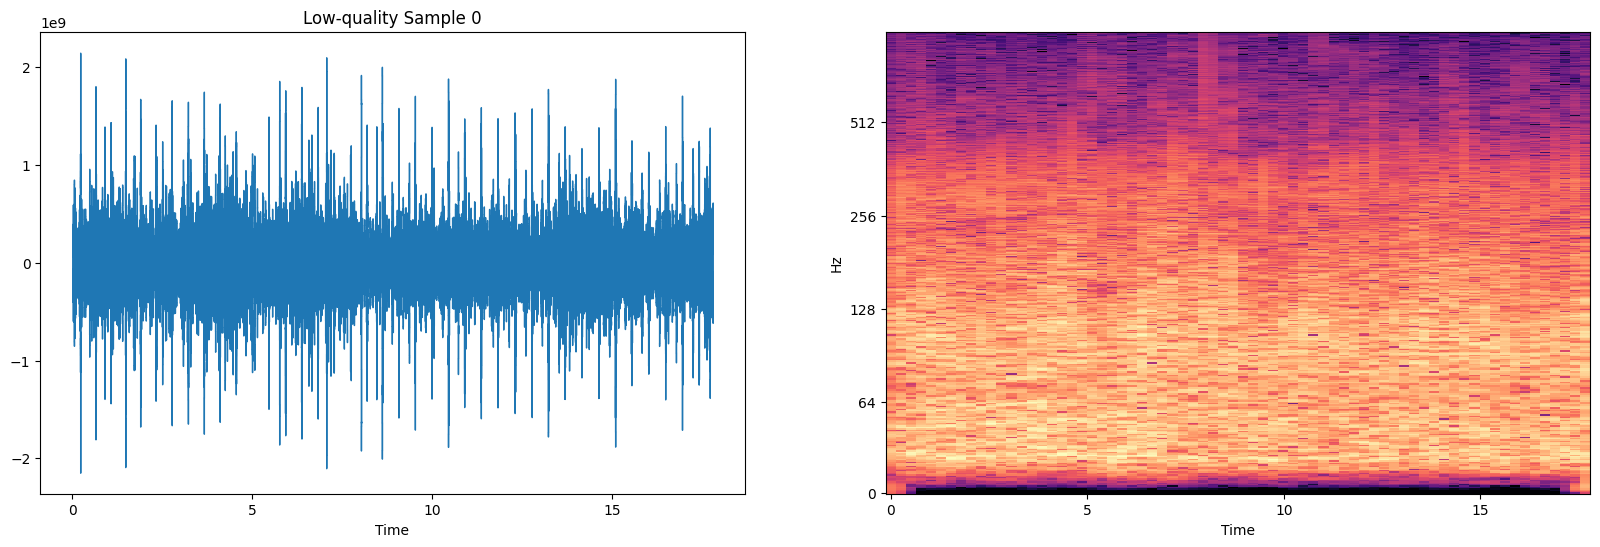

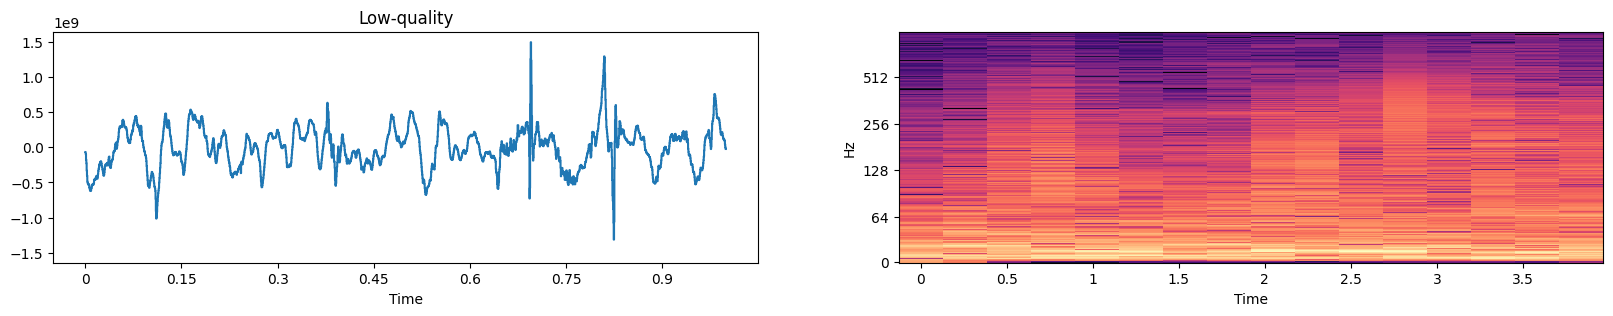

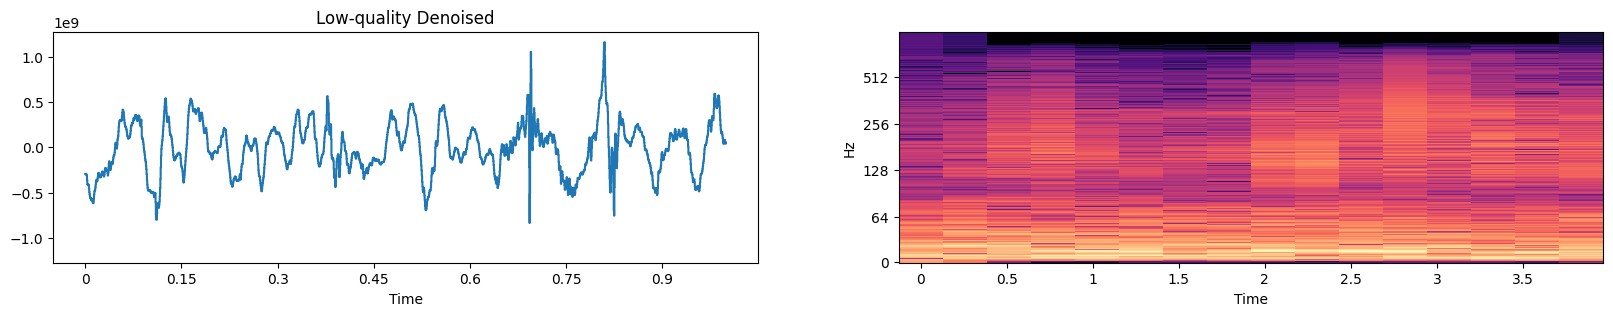

In [2]:
# 随机显示1个随机样本
from notebook_utils import view_random_samples  # 导入样本可视化函数
view_random_samples(n_samples=1, seed=1)  # 显示1个随机心音样本，固定随机种子确保可重复性

# 展示小波去噪效果
from notebook_utils import view_wavlet_denoising  # 导入小波去噪可视化函数
view_wavlet_denoising()  # 展示去噪前后的心音信号对比

In [3]:
# 从特征提取模块导入函数，提取单个音频段的特征
from feature_extraction import extract_segment_features  # 导入单段音频特征提取函数
import notebook_utils  # 导入数据工具模块，包含已加载的心音数据集
print([extract_segment_features(notebook_utils.high_quality_dataset[0][0])])  # 提取并打印第一个高质量样本的特征向量

[[50000.0, 3.9413123, 50.422558, 6698.9756, 12.943245382366452, 0.7744559929509647, 5141.23681640625, -2554.6063842773438, 50.42255783081055, 2586.6304321289062, 0.060589917568552684, 6698.9766, 1.6574160300273755, 12.370665985796808, 7.463826680614693, 103.29165031122076, 260.0466080639758, 277.7269390428014, 0.0063345954, 415.76450892857144, 15.530617396897481, 3.7510896158142444, 1.2722857757024477, 1.3031572989625255, 44876270.0, 0.2641073481663608, 2.067742302362892, 6343.665, 7036.3643, 64176.664, 0.7098830026993491, 952.2431, 149.27316, 46.72793, 14.426437, -4.655278, -8.722643, -6.9354496, -0.0046435967, -4.994168, 1.1440822, -10.405757, -6.2526155, -11.614207]]


In [4]:
# 分割整个数据集音频
from segmentation import build_segements
import notebook_utils
segmented_sounds = build_segements(notebook_utils.dataset_arr, sr = 2000)
print(len(segmented_sounds))

16527


d:\Code_Files\实验4\code\utils.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


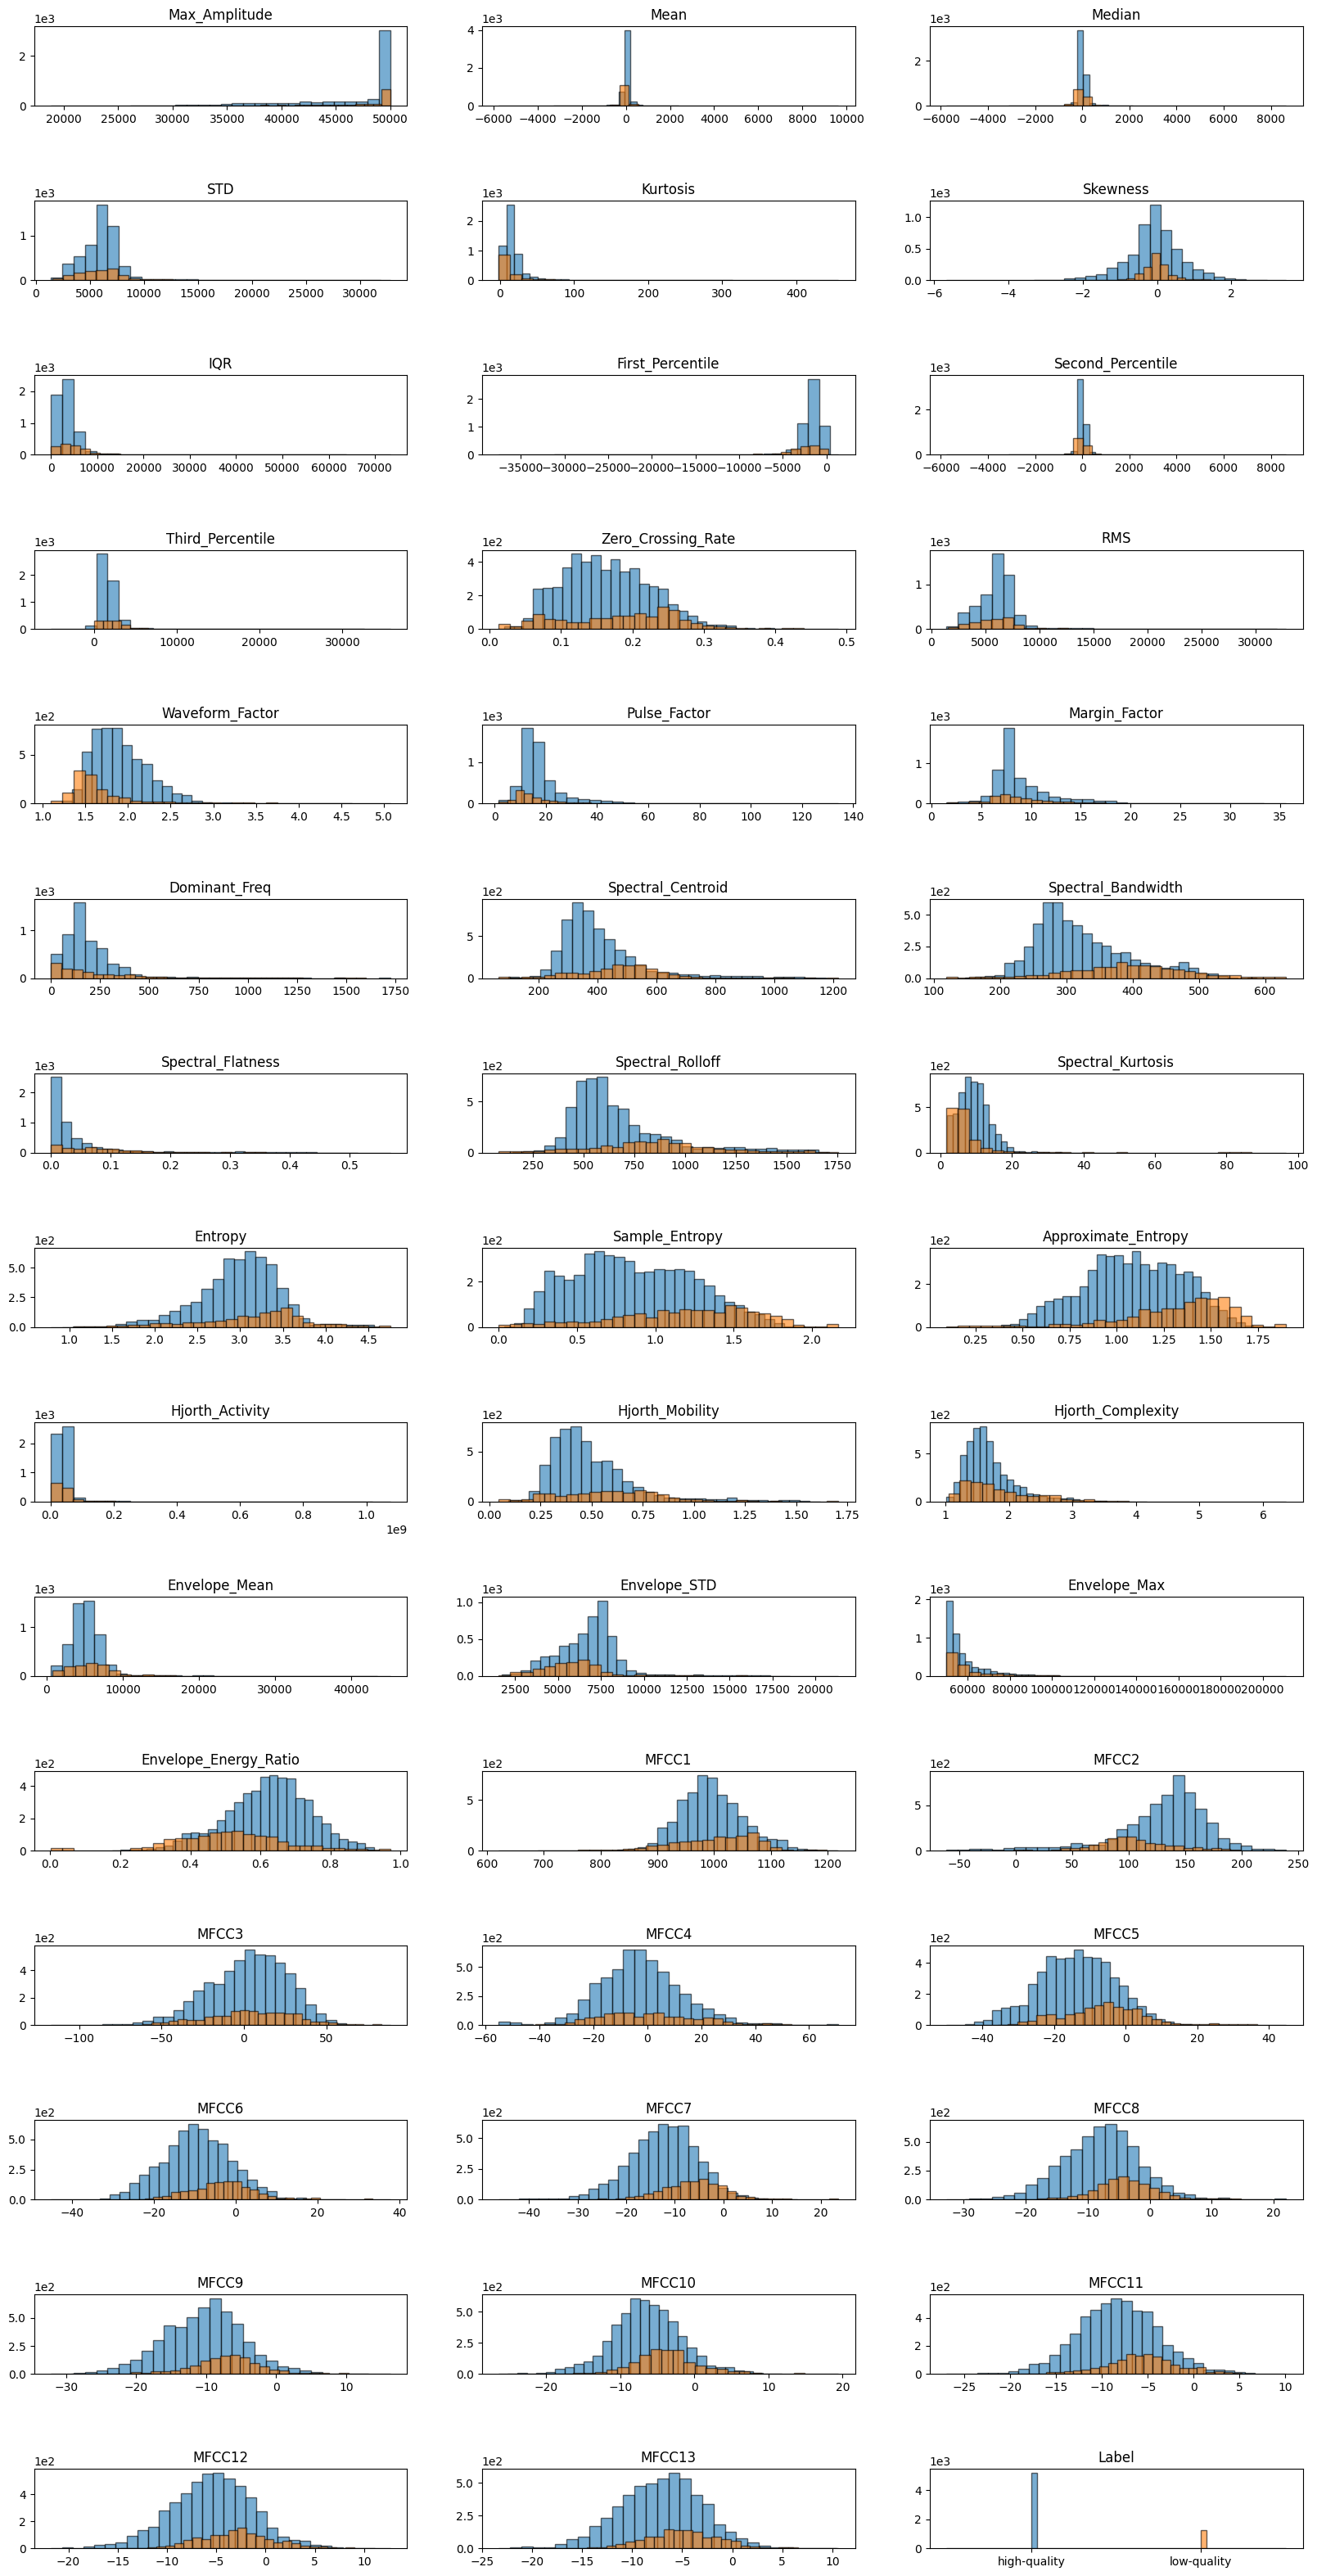

In [5]:
# 加载心音信号特征数据，得到整体、高质量、低质量三个dataframe
from utils import features_histo, load_heartsound_features  # 导入直方图绘制和数据加载函数
import pandas as pd  # 导入数据处理库
hs_df, high_quality_df, low_quality_df = load_heartsound_features()  # 加载已提取的特征数据，分为三类
dfs = [high_quality_df, low_quality_df]  # 将高质量和低质量数据框放入列表
# 画出高低质量样本的特征分布直方图
features_histo(dfs)  # 绘制特征分布直方图，对比两类样本的特征差异

In [6]:
import numpy as np  # 导入数值计算库
import pandas as pd  # 导入数据处理库
from sklearn.model_selection import train_test_split  # 导入数据集分割函数
from sklearn.preprocessing import MinMaxScaler  # 导入数据归一化类
from utils import load_data  # 导入数据加载函数
from segmentation import build_segements  # 导入音频分段函数
from feature_extraction import extract_segment_features  # 导入特征提取函数
from classifiers import classifiers  # 导入分类器配置

In [7]:
# 加载所有记录
all_records = load_data()  # 从文件加载所有心音记录数据
# 按record级别划分训练集/测试集
train_records, test_records = train_test_split(  # 将数据分割为训练集和测试集，测试集占20%，固定随机种子确保可重复性
    all_records, test_size=0.2, random_state=42
)

In [8]:
print(f"训练记录数量: {len(train_records)}")
print(f"数据类型: {type(train_records)}")

训练记录数量: 6314
数据类型: <class 'numpy.ndarray'>


In [9]:
# 对训练集记录进行分段并提取特征
train_segments = build_segements(train_records, sr=2000)  # 对训练集记录进行分段处理
print("finsh 1")
train_features = [  # 使用列表推导式提取每个分段特征
    extract_segment_features(seg[0]) + [seg[1]]  # 提取音频特征并添加标签
    for seg in train_segments  # 遍历所有训练分段
]
print("finsh 2")

columns = [  # 定义所有特征列的名称
    "Max_Amplitude", "Mean", "Median", "STD", "Kurtosis", "Skewness", "IQR",  # 时域统计特征
    "First_Percentile", "Second_Percentile", "Third_Percentile",  # 百分位特征
    "Zero_Crossing_Rate", "RMS", "Waveform_Factor", "Pulse_Factor", "Margin_Factor",  # 波形特征
    "Dominant_Freq", "Spectral_Centroid", "Spectral_Bandwidth",  # 频域特征
    "Spectral_Flatness", "Spectral_Rolloff", "Spectral_Kurtosis",  # 频谱特征
    "Entropy", "Sample_Entropy", "Approximate_Entropy",  # 非线性熵特征
    "Hjorth_Activity", "Hjorth_Mobility", "Hjorth_Complexity",  # Hjorth参数
    "Envelope_Mean", "Envelope_STD", "Envelope_Max", "Envelope_Energy_Ratio",  # 包络特征
    "MFCC1", "MFCC2", "MFCC3", "MFCC4", "MFCC5", "MFCC6", "MFCC7",  # MFCC特征前7维
    "MFCC8", "MFCC9", "MFCC10", "MFCC11", "MFCC12", "MFCC13",  # MFCC特征后6维
    "Label",  # 标签列
]

# 将训练特征转换为dataframe，方便后续操作
train_df = pd.DataFrame(train_features, columns=columns)  # 将特征列表转换为pandas数据框
train_df

finsh 1
finsh 2


,Max_Amplitude,Mean,Median,STD,Kurtosis,Skewness,IQR,First_Percentile,Second_Percentile,Third_Percentile,...,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13,Label
0,40775.566406,219.724350,216.192017,6367.682129,10.943826,-0.313070,2878.178680,-1215.377472,216.192009,1662.801208,...,-26.886684,-12.148666,-18.805677,-14.702842,-15.762472,-14.076980,-6.635096,-2.480296,-6.216208,high-quality
1,37964.667969,-35.728634,65.096153,7279.183105,11.270870,-0.052502,2416.230377,-1261.600769,65.096153,1154.629608,...,-17.186150,-5.772529,-15.152287,-2.174563,-14.814414,-13.025238,-16.235882,-11.280972,-7.490046,high-quality
2,35775.457031,20.686701,-4.860759,6224.284180,14.119406,-0.310879,2091.585083,-1049.889618,-4.860759,1041.695465,...,-8.228193,-6.617456,-14.803659,-5.472821,-16.467697,-9.006590,-15.607330,-14.465565,-7.963075,high-quality
3,33994.996094,0.879161,-17.424942,6533.687988,13.032980,-0.537090,2204.076355,-1078.787537,-17.424942,1125.288818,...,-12.075403,-5.401956,-17.515518,-5.136642,-13.891954,-8.487268,-17.094238,-14.185199,-9.408243,high-quality
4,34162.636719,-0.869403,9.513798,6499.256348,13.017199,-0.440852,2169.879791,-1093.852570,9.513798,1076.027222,...,-10.807004,-5.122832,-16.257149,-10.328524,-13.485841,-9.897314,-13.125095,-15.231552,-10.635001,high-quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13198,50000.000000,1.811783,-26.157410,6987.860352,10.552943,1.001951,4885.565369,-2481.582703,-26.157410,2403.982666,...,-1.663441,1.557593,-9.536589,-6.498620,-8.616813,-9.936834,-12.010749,-9.859875,-13.634691,high-quality
13199,50000.000000,-89.294662,-103.831306,6883.062500,24.523526,0.213900,2171.737228,-1176.646484,-103.831306,995.090744,...,4.520269,-8.680826,2.611627,0.344727,-7.889116,-2.924017,3.085160,-7.687382,-5.025918,low-quality
13200,42838.121094,-173.789368,-99.709221,4488.531250,12.038708,-0.610717,4052.264038,-2151.193359,-99.709221,1901.070679,...,-2.821249,-3.865736,-0.120348,-3.302009,-7.668025,-3.816337,-5.387566,-0.639987,-5.234449,low-quality
13201,44901.824219,460.974060,257.623383,7024.251465,4.733484,0.196870,6417.316650,-2825.065735,257.623383,3592.250916,...,-21.435982,-11.479982,-10.575830,-8.247534,-5.739073,-3.783516,-4.301328,-1.519246,-5.042675,low-quality


In [13]:
# 同样处理测试集，分段提取特征
test_segements = build_segements(test_records, sr=2000)  # 对测试集记录进行分段处理
test_features = [  # 使用列表推导式提取每个分段特征
    extract_segment_features(seg[0]) + [seg[1]]  # 提取音频特征并添加标签
    for seg in test_segements  # 遍历所有测试分段
]
test_df = pd.DataFrame(test_features, columns=columns)  # 将测试特征列表转换为pandas数据框

In [14]:
# 准备特征矩阵和标签
X_train = train_df.drop(columns=["Label"])  # 从训练数据框中移除标签列，得到特征矩阵
X_test = test_df.drop(columns=["Label"])    # 从测试数据框中移除标签列，得到特征矩阵
y_train = (train_df["Label"] == "high-quality").astype(int)  # 将训练标签转换为二进制（高质量=1）
y_test = (test_df["Label"] == "high-quality").astype(int)    # 将测试标签转换为二进制（高质量=1）

In [15]:
# 删除缺失值样本
X_train = X_train.dropna()  # 删除训练特征中的缺失值样本
X_test = X_test.dropna()    # 删除测试特征中的缺失值样本
y_train = y_train.loc[X_train.index]  # 同步更新训练标签，保持索引一致
y_test = y_test.loc[X_test.index]    # 同步更新测试标签，保持索引一致

In [16]:
# 对特征进行0-1归一化处理
scaler = MinMaxScaler().fit(X_train)  # 创建归一化器并用训练数据拟合
X_train_scaled = pd.DataFrame(  # 对训练特征进行归一化
    scaler.transform(X_train),  # 应用归一化转换
    columns=X_train.columns,  # 保持原列名
    index=X_train.index  # 保持原索引
)

X_test_scaled = pd.DataFrame(  # 对测试特征进行归一化
    scaler.transform(X_test),  # 应用相同的归一化转换
    columns=X_test.columns,  # 保持原列名
    index=X_test.index  # 保持原索引
)

In [17]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif  # 导入特征选择相关模块

# 使用SelectKBest基于互信息选择特征
selector = SelectKBest(score_func=mutual_info_classif, k=20)  # 创建特征选择器，选择前20个重要特征
selector.fit(X_train_scaled, y_train)  # 用训练数据拟合特征选择器

# 获取选中的特征
selected_features = X_train_scaled.columns[selector.get_support()].tolist()  # 获取被选中的特征名称列表
print("基于互信息选中的特征:", selected_features)  # 打印选中的特征名称

基于互信息选中的特征: ['Kurtosis', 'IQR', 'First_Percentile', 'Third_Percentile', 'Zero_Crossing_Rate', 'Waveform_Factor', 'Dominant_Freq', 'Spectral_Centroid', 'Spectral_Bandwidth', 'Spectral_Flatness', 'Spectral_Rolloff', 'Spectral_Kurtosis', 'Entropy', 'Sample_Entropy', 'Approximate_Entropy', 'Hjorth_Mobility', 'MFCC5', 'MFCC6', 'MFCC7', 'MFCC8']


In [18]:
# import shap  # 导入模型解释性分析库
import matplotlib.pyplot as plt  # 导入绘图库
import pandas as pd  # 导入数据处理库
from sklearn.metrics import f1_score, accuracy_score, recall_score  # 导入评估指标函数

# 遍历每个分类器
for clf in classifiers:  # 遍历三个预定义分类器配置
    name = clf['name']  # 获取当前分类器名称
    print(f"{name} 正在处理模型: {name} ================")  # 打印当前处理的模型名称

    f1_list = []  # 初始化F1分数列表
    acc_list = []  # 初始化准确率列表
    recall_list = []  # 初始化召回率列表
    feature_counts = list(range(1, len(selected_features) + 1))  # 从1个特征到所有特征逐步增加

    for n_features in feature_counts:  # 遍历不同特征数量
        selected_subset = selected_features[:n_features]  # 选择前n_features个特征
        X_train_sel = X_train_scaled[selected_subset]  # 从训练集中提取选中的特征子集
        X_test_sel = X_test_scaled[selected_subset]  # 从测试集中提取选中的特征子集

        model = clf['method'](**clf['cached'].get_params())  # 用缓存的模型参数初始化模型实例
        model.fit(X_train_sel, y_train)  # 用训练数据训练分类器模型

        y_pred = model.predict(X_test_sel)  # 训练好的模型对测试集进行预测

        f1 = f1_score(y_test, y_pred)  # 计算F1分数
        acc = accuracy_score(y_test, y_pred)  # 计算准确率
        recall = recall_score(y_test, y_pred)  # 计算召回率

        f1_list.append(f1)  # 将F1分数添加到列表
        acc_list.append(acc)  # 将准确率添加到列表
        recall_list.append(recall)  # 将召回率添加到列表


SVM 正在处理模型: SVM ================
Random Forest 正在处理模型: Random Forest ================
XGboost 正在处理模型: XGboost ================


## （选做）SHAP图绘制

In [25]:
## （选做）SHAP图绘制
import shap
if n_features == len(selected_features):  # 只在使用全部特征时做SHAP可视化
    print(f"生成 SHAP 图：{name}")  # 打印SHAP图生成提示
    try:  # 尝试生成SHAP图，防止错误中断程序
        if name == 'SVM':
            model_for_shap = lambda x: model.decision_function(x)  # 创建SHAP可用的模型函数
            explainer = shap.KernelExplainer(model_for_shap, X_train_sel.iloc[:400, :])  # 创建核解释器
            shap_values = explainer.shap_values(X_test_sel.iloc[:200, :])  # 计算SHAP值
            shap.summary_plot(shap_values, X_test_sel.iloc[:200, :], feature_names=selected_subset, show=True)  # 绘制SHAP摘要图

        elif name == 'Random Forest':
            explainer = shap.TreeExplainer(model)  # 创建树解释器
            X_test_np = X_test_sel.values if hasattr(X_test_sel, "values") else X_test_sel  # 确保数据格式正确
            shap_values = explainer.shap_values(X_test_np)  # 计算SHAP值
            shap_values_to_plot = shap_values[:, :, 1]  # 提取正类的SHAP值
            X_test_df = pd.DataFrame(X_test_np, columns=selected_subset)  # 创建数据框用于绘图
            shap.summary_plot(shap_values_to_plot, X_test_df, show=True)  # 绘制SHAP摘要图

        elif name == 'XGboost':
            explainer = shap.TreeExplainer(model)  # 创建树解释器
            shap_values = explainer.shap_values(X_test_sel)  # 计算SHAP值
            shap.summary_plot(shap_values, X_test_sel, feature_names=selected_subset, show=True)  # 绘制SHAP摘要图

    except Exception as e:
        print(f"{name} SHAP 可视化失败; {e}")

生成 SHAP 图：XGboost
XGboost SHAP 可视化失败; 'utf-8' codec can't decode byte 0xbf in position 1013: invalid start byte


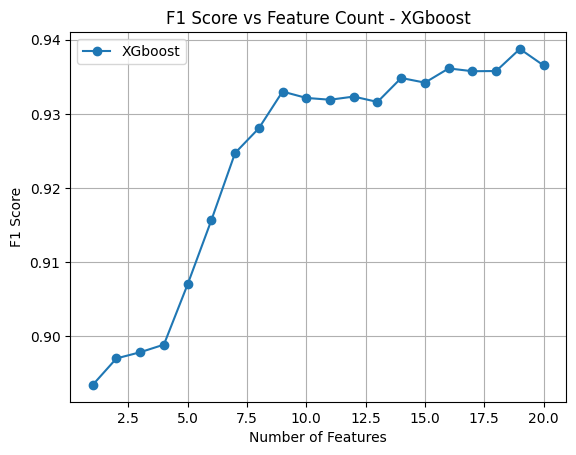

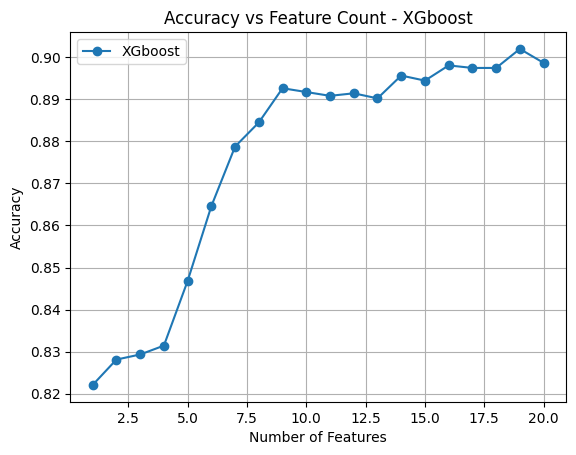

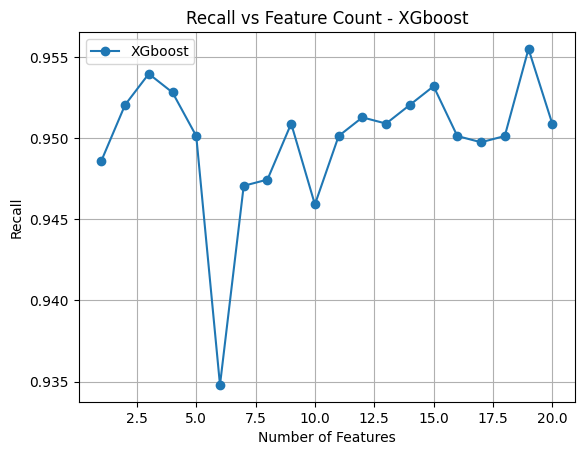

In [20]:
# 绘制F1分数折线图
plt.figure()  # 创建新图形
plt.plot(feature_counts, f1_list, marker='o', label=f'{name}')  # 绘制F1分数折线图
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.title(f'F1 Score vs Feature Count - {name}')
plt.grid(True)
plt.legend()
plt.show()

# 绘制准确率折线图
plt.figure()
plt.plot(feature_counts, acc_list, marker='o', label=f'{name}')  # 绘制准确率折线图
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title(f'Accuracy vs Feature Count - {name}')
plt.grid(True)
plt.legend()
plt.show()

# 绘制召回率折线图
plt.figure()
plt.plot(feature_counts, recall_list, marker='o', label=f'{name}')  # 绘制召回率折线图
plt.xlabel('Number of Features')
plt.ylabel('Recall')
plt.title(f'Recall vs Feature Count - {name}')
plt.grid(True)
plt.legend()
plt.show()

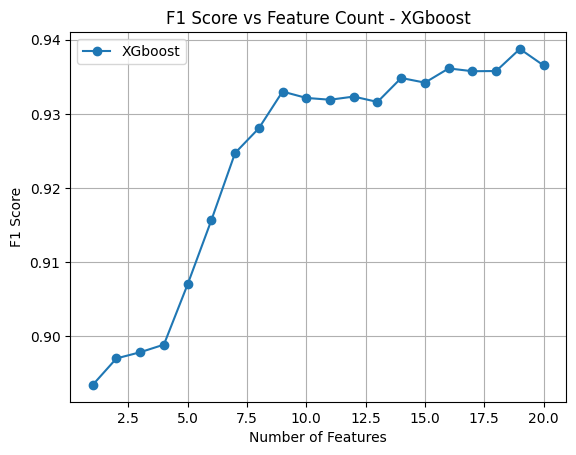

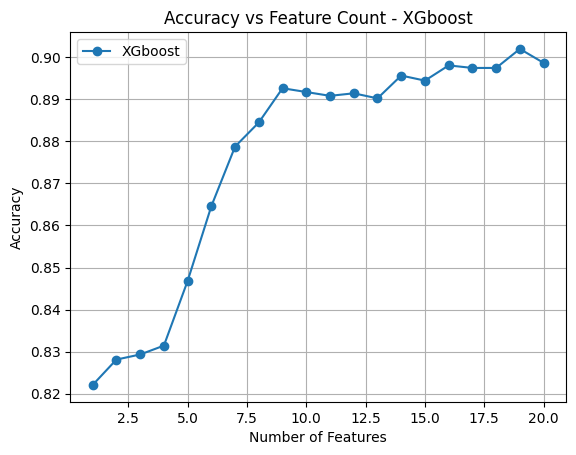

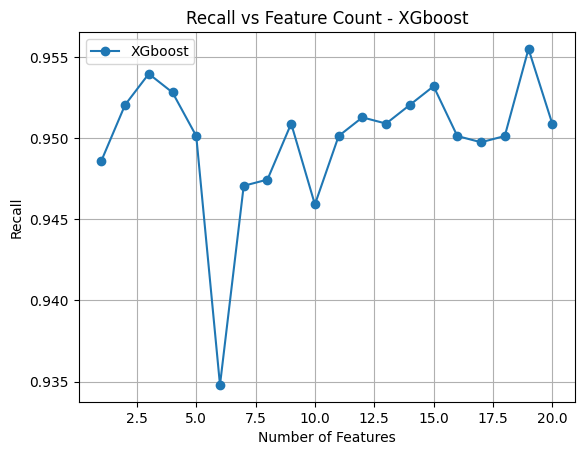

In [26]:
# 绘制F1分数折线图
plt.figure()  # 创建新图形
plt.plot(feature_counts, f1_list, marker='o', label=f'{name}')  # 绘制F1分数折线图
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.title(f'F1 Score vs Feature Count - {name}')
plt.grid(True)
plt.legend()
plt.show()

# 绘制准确率折线图
plt.figure()
plt.plot(feature_counts, acc_list, marker='o', label=f'{name}')  # 绘制准确率折线图
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title(f'Accuracy vs Feature Count - {name}')
plt.grid(True)
plt.legend()
plt.show()

# 绘制召回率折线图
plt.figure()
plt.plot(feature_counts, recall_list, marker='o', label=f'{name}')  # 绘制召回率折线图
plt.xlabel('Number of Features')
plt.ylabel('Recall')
plt.title(f'Recall vs Feature Count - {name}')
plt.grid(True)
plt.legend()
plt.show()